<a href="https://colab.research.google.com/github/meganhsu/ML100-Days/blob/master/Day_060_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA 範例
* 以 PCA + 邏輯斯迴歸判斷手寫辨識資料集, 觀察不同 component 下正確率的變化

In [0]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

from matplotlib.font_manager import FontProperties  
fontSet  = FontProperties(fname=r"c:\Windows\Fonts\msjhbd.ttc", size=10)

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [0]:
# 定義 PCA 與隨後的羅吉斯迴歸函數
# penalty 改為 L1, max_iter 改為 100
logistic = SGDClassifier(loss='log', penalty='l1', max_iter=100, tol=1e-5, random_state=0)
pca = PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# 載入手寫數字辨識集
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

# 作業
* 將參數 penalty 改為 L1, max_iter 改為 100, 觀察 PCA 與羅吉斯迴歸做手寫辨識的效果

In [0]:
# 執行 GridSearchCV 跑出最佳參數
param_grid = {
    'pca__n_components': [4, 10, 20, 30, 40, 50, 64],
    'logistic__alpha': np.logspace(-4, 4, 5),
}
search = GridSearchCV(pipe, param_grid, iid=False, cv=5, return_train_score=False)
search.fit(X_digits, y_digits)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.912):
{'logistic__alpha': 0.01, 'pca__n_components': 20}


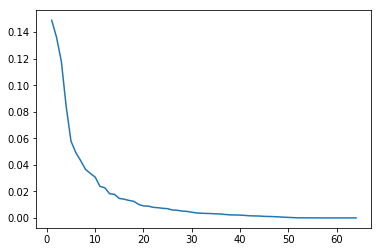

In [0]:
# 繪製不同 components 的 PCA explained variance ratio
pca.fit(X_digits)
xlabels=np.array(np.arange(len(pca.explained_variance_ratio_))+1)
plt.plot(xlabels,pca.explained_variance_ratio_)

NameError: name 'x' is not defined

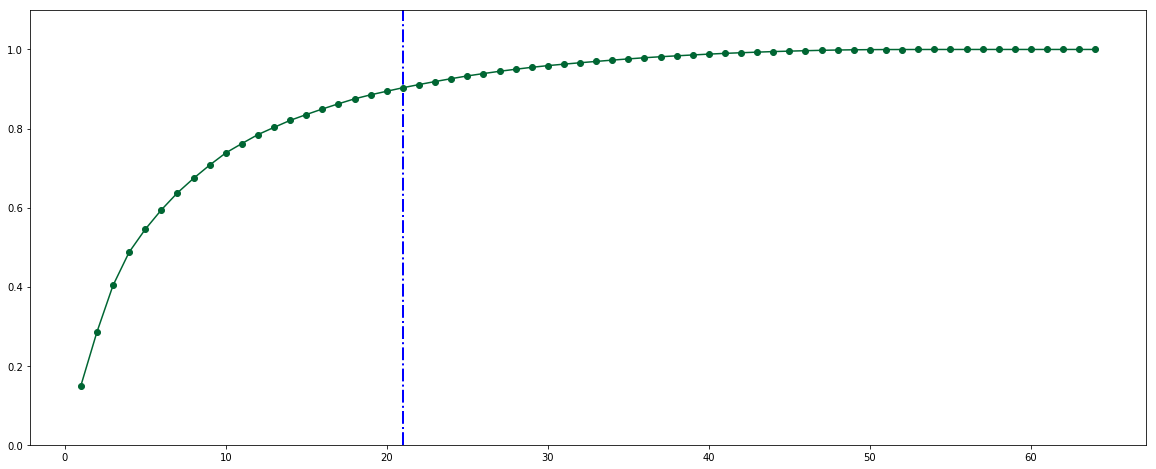

In [0]:
import matplotlib.pyplot as plt
import numpy as np

# 變異累計柏拉圖
xlabels = np.array(np.arange(len(pca.explained_variance_ratio_))+1)
y1 = pca.explained_variance_ratio_
y1 = -1*np.sort(-y1)  # 反向排序
y2 = np.cumsum(y1/np.sum(y1))

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(111)
ax1.plot(xlabels, y2, color = '#006633', marker='o') 
index = np.argwhere((y2>=0.9)) #累積解釋變異百分比
plt.vlines(x=index[0][0]+1,ymin=0,ymax=1.1,linewidth=2,linestyle='-.',color='B') #畫直線
#setting
ax1.set_ylim(0,1.1)
for a,b,c in zip(x,y1,y2*100):
    ax1.text(a, c/100+0.05, '%.0f%%' % c, ha='center', va= 'bottom',fontsize=8,color='#006633')

In [0]:
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.25, random_state=4)

In [0]:
#建模
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
clf = SGDClassifier(alpha=0.01, loss='log', penalty='l1', max_iter=100, tol=1e-5, random_state=0) #模型
train_accuracy_scores = []
test_accuracy_scores = []
for i in xlabels:
    clf.fit(x_train_pca[:,0:i],y_train)    
    y_train_pred = clf.predict(x_train_pca[:,0:i]) #訓練預測結果
    y_test_pred = clf.predict(x_test_pca[:,0:i]) #測試預測結果
    train_accuracy_scores_temp=metrics.accuracy_score(y_train, y_train_pred) #訓練正確率
    test_accuracy_scores_temp=metrics.accuracy_score(y_test, y_test_pred) #測試正確率
    train_accuracy_scores.append(train_accuracy_scores_temp)
    test_accuracy_scores.append(test_accuracy_scores_temp)

Text(0,0.5,'Accuracy')

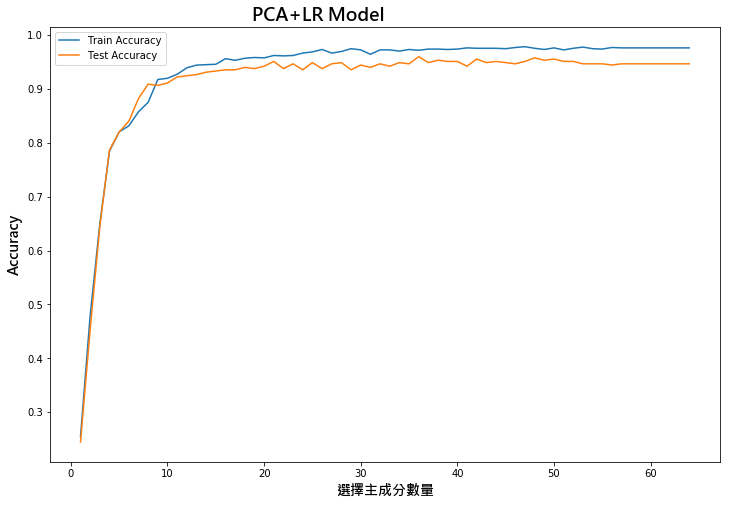

In [0]:
# 繪製不同採樣點的 accuracy
pca.fit(X_digits)
xlabels=np.array(np.arange(len(pca.explained_variance_ratio_))+1)
plt.figure(figsize=(12,8))
plt.plot(xlabels,train_accuracy_scores,label='Train Accuracy')
plt.plot(xlabels,test_accuracy_scores,label='Test Accuracy')
plt.legend()
plt.title('PCA+LR Model',fontproperties=fontSet,fontsize=18,horizontalalignment='right')
plt.xlabel('選擇主成分數量',fontproperties=fontSet,fontsize=14)
plt.ylabel('Accuracy',fontproperties=fontSet,fontsize=14,rotation=90)